# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
import statsmodels.api as sm
df = pd.read_csv('human_body_temperature.csv')

## Question 1: Is the distribution of body temperatures normal?

In [57]:
# Read data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [58]:
scipy.stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The dataset has a p-value of approximately 0.26, which is greater than alpha of 0.05. As such,
the null hypothesis (no difference between the sample and theoretical data) can be rejected.

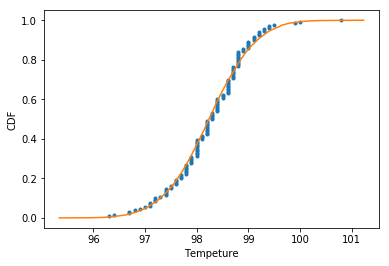

In [59]:
# CDF Test

# Find mean and standard deviation of sample
mean_temp = np.mean(df.temperature)
mean_std = np.std(df.temperature)

# Create CDF
def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Obtain the normal distribution of sample
normal = np.random.normal(mean_temp,mean_std, 10000)

# Run CDF tests for sample and theoretical distributions
x, y = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

plt.plot(x, y, marker='.', ls='None')
plt.plot(x_norm, y_norm)
plt.xlabel('Tempeture')
plt.ylabel('CDF')
plt.show()

The CDF graph shows that the sample distribution fits with the theoretical normal distribution. This shows that the dataset is normally distribution.

### Answer 1: The body temperature data set is normally distributed.

## Question 2: Is the sample size large? Are the observations independent?

### Answer 2: The sample size is large and independent.
The sample consists of 130 samples, which is more than the minimum 30 samples. As such, this sample size would be considered large. The observations are independent because the temperatures are taken from different people.

## Question 3: Is the true population mean really 98.6 degrees F?

In [60]:
# T Test
# This test is used is used given how the variance isn't known
given_mean = 98.6
scipy.stats.ttest_1samp(df.temperature, given_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The T-test provides a small p-value that is less than 0.05. Subsequently, I can reject the null hypothesis that the true mean temperature and the given temperature of 98.6 are the same.

In [61]:
# Z Test
# Create Z Test function
def z_test(data1,x2):
    mean_val = np.mean(data1)
    std_val = np.std(data1)
    se = std_val/np.sqrt(len(data1))
    z_value = (mean_val-x2)/se
    return z_value

# Perform Z Test
z_stat = z_test(df.temperature,98.6)
p_val = scipy.stats.norm.sf(np.abs(z_stat))*2
print(z_stat)
print(p_val)

-5.475925202078116
4.3523151658821886e-08


The Z-test provides a similar statistic yet a completely different p-value. However, since the p-value is also less than 0.05, this test also supports the conclusion that I can reject the null hypothesis and that subsequently the true temperature is not 98.6.

### Answer 3: The true population mean is not 98.6 degrees F.

To compute the p-value, I would use the one-sample t-test type because of how I'm testing a singular data set and because the variance is not known.

## Question 4: Draw a small sample of size 10 from the data and repeat both frequency tests.

In [62]:
# Create new smaller sample size
new_sample = df.sample(10,random_state=50)
new_sample

,temperature,gender,heart_rate
121,97.9,F,68.0
55,98.6,F,82.0
116,100.8,F,77.0
12,98.2,M,72.0
38,97.9,F,79.0
21,98.2,M,71.0
128,97.9,M,72.0
16,98.3,F,79.0
104,97.6,M,69.0
89,98.1,M,73.0


In [63]:
# T-Test on smaller sample
t_stat_small,p_val_small_t = scipy.stats.ttest_1samp(new_sample.temperature, 98.6)
print('T-test yields statistic={} and p-value={}.'.format(t_stat_small,p_val_small_t))
# Z-test on smaller sample
z_stat = z_test(new_sample.temperature,98.6)
p_val = scipy.stats.norm.sf(np.abs(z_stat))*2
print("Z-test yields statistic={} and p-value={}.".format(z_stat,p_val))

T-test yields statistic=-0.8751154742436703 and p-value=0.40426012207689765.
Z-test yields statistic=-0.9224527047561385 and p-value=0.35629248920596857.


Conducting T-test and Z-test on a smaller sample size yields different results. For both tests, the p-value is greater than 0.05, meaning that the null hypothesis (true mean temperature is 98.6 degrees fahrenheit) is accepted. Subsequently, this indicates that statistical testing is less reliable at discerning the difference between the smaller sample mean and population means sample size.

### Answer 4: The frequency tests on smaller set yield statistically different results
Subsequently, this shows that the tests cannot reliability differentiate between between sample mean and population means when involving smaller sample sizes.

## Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

In [64]:
# Conducting the test will involve determining margin of error and confidence interval
# Margin of Error
z_critical_99 = scipy.stats.norm.ppf(0.995)
temp_stdev = np.std(df.temperature)
margin_of_error_99 = z_critical_99*(temp_stdev/np.sqrt(len(df.temperature)))

# 99% Confidence Interval
temp_mean = np.mean(df.temperature)
confidence_interval_99 = (temp_mean - margin_of_error_99,temp_mean + margin_of_error_99)
print('The 99% confidence interval is ({:2.2f}, {:2.2f}).'.format(confidence_interval_99[0],confidence_interval_99[1]))

The 99% confidence interval is (98.08, 98.41).


### Answer 5: The normal human temperature should lie in the 95% confidence interval from 98.12 to 98.37 degrees Fahrenheit.

## Question 6: Is there a significant difference between males and females in normal temperature?

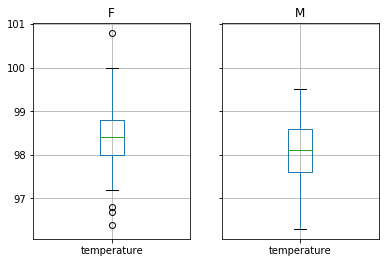

In [65]:
# Box-and-Whisker Plot
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes')
plt.show()

There appears to be a difference in the means and ranges of the two gender data sets. However, the means of both genders are within the interquartile range of the other, suggesting no significant difference between the temperature of the two genders.

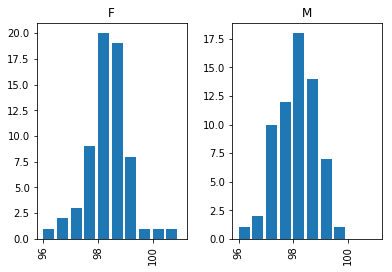

In [66]:
# Histogram
_ = df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])

plt.show()

In [67]:
# T-Test anaylsis
male_temp = df['temperature'][df.gender=='M']
female_temp = df['temperature'][df.gender=='F']
t_statistic, p_val = scipy.stats.ttest_ind(male_temp,female_temp)
print("2-Sample T-Test is used because there are 2 sample temperature groups (Male and Female) and variance isn't known.")
print('The T-statistic is {:2.2f} and the p-value is {:2.2f}.'.format(t_statistic,p_val))

2-Sample T-Test is used because there are 2 sample temperature groups (Male and Female) and variance isn't known.
The T-statistic is -2.29 and the p-value is 0.02.


In [68]:
# Confidence Intervals
"""
male_temp_stdev = np.std(male_temp)
male_margin_of_error_99 = z_critical_99*(male_temp_stdev/np.sqrt(len(male_temp)))
male_confidence_interval = (np.mean(male_temp) - male_margin_of_error_99,np.mean(male_temp) + male_margin_of_error_99)
print("\nThe 95% male confidence interval is ({:2.2f}, {:2.2f}).".format(male_confidence_interval[0],male_confidence_interval[1]))

female_temp_stdev = np.std(female_temp)
female_margin_of_error_99 = z_critical_99*(female_temp_stdev/np.sqrt(len(female_temp)))
female_confidence_interval = (np.mean(female_temp) - female_margin_of_error_99,np.mean(female_temp) + female_margin_of_error_99)
print("The 95% female confidence interval is ({:2.2f}, {:2.2f}).".format(female_confidence_interval[0],female_confidence_interval[1]))
"""
male_mean = np.mean(male_temp)
print(male_mean)
female_mean = np.mean(female_temp)
print(female_mean)
temp_mean = np.mean(df.temperature)
confidence_interval_99 = (temp_mean - margin_of_error_99,temp_mean + margin_of_error_99)
print('The 99% confidence interval is ({:2.2f}, {:2.2f}).'.format(confidence_interval_99[0],confidence_interval_99[1]))

98.1046153846154
98.39384615384613
The 99% confidence interval is (98.08, 98.41).


In [69]:



def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size = 1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

empirical_diff_means = diff_of_means(female_temp, male_temp)

perm_replicates = draw_perm_reps(female_temp, male_temp, 
                                 diff_of_means, size = 10000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0119

### Answer 6: There is a difference in temperature between the genders.
The 2-Sample T-Test yields a p-value of 0.02 and a separate permuation test yields a p-value of 0.0131. Since both p-values are less than 0.05, , which is also less than 0.05. As both p-values are less than 0.05, there is a significant difference between the two body temperature. 

### Summary
In summary, the statistical analysis offers many insights into the data on human body temperature. The body temperatures values are normally distributed. The previously established body temperature of 98.6 degrees fahrenheit is incorrect. Instead, base on a 99% confidence interval, the human body temperature is from 98.08 to 98.41 degrees fahrenheit. Finally, there is a statistical difference between the genders in body temperature.